## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi


Thu Dec 03 15:34:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 442.23       Driver Version: 442.23       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P8     6W /  N/A |    134MiB /  4096MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [10]:
len(keras.datasets.cifar10.load_data())

2

In [13]:
## 讀取資料
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
"""Code Here
資料前處理
"""
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5) # 做 MinMax 化
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
## Show enumerate
num_neurons=[512, 256, 256, 128, 128]
list(enumerate(num_neurons))

[(0, 512), (1, 256), (2, 256), (3, 128), (4, 128)]

In [17]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)               

In [18]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [19]:
## 優化函數設定
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [20]:
## 訓練模型
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 12ms/step - loss: 1.6946 - accuracy: 0.3981 - val_loss: 1.5448 - val_accuracy: 0.4491
Epoch 2/100
196/196 [==============================] - 2s 11ms/step - loss: 1.4647 - accuracy: 0.4800 - val_loss: 1.4539 - val_accuracy: 0.4893
Epoch 3/100
196/196 [==============================] - 2s 11ms/step - loss: 1.3400 - accuracy: 0.5266 - val_loss: 1.3947 - val_accuracy: 0.5085
Epoch 4/100
196/196 [==============================] - 2s 11ms/step - loss: 1.2425 - accuracy: 0.5589 - val_loss: 1.3818 - val_accuracy: 0.5133
Epoch 5/100
196/196 [==============================] - 2s 11ms/step - loss: 1.1568 - accuracy: 0.5894 - val_loss: 1.3690 - val_accuracy: 0.5277
Epoch 6/100
196/196 [==============================] - 2s 11ms/step - loss: 1.0730 - accuracy: 0.6198 - val_loss: 1.3730 - val_accuracy: 0.5297
Epoch 7/100
196/196 [==============================] - 2s 11ms/step - loss: 0.9992 - accuracy: 0.6424 - val_loss: 1.3918 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 0.1045 - accuracy: 0.9658 - val_loss: 4.0470 - val_accuracy: 0.5289
Epoch 58/100
196/196 [==============================] - 2s 12ms/step - loss: 0.0812 - accuracy: 0.9737 - val_loss: 4.1543 - val_accuracy: 0.5335
Epoch 59/100
196/196 [==============================] - 2s 12ms/step - loss: 0.0949 - accuracy: 0.9694 - val_loss: 3.9388 - val_accuracy: 0.5260
Epoch 60/100
196/196 [==============================] - 2s 12ms/step - loss: 0.0998 - accuracy: 0.9672 - val_loss: 4.0539 - val_accuracy: 0.5315
Epoch 61/100
196/196 [==============================] - 2s 12ms/step - loss: 0.0959 - accuracy: 0.9687 - val_loss: 3.9526 - val_accuracy: 0.5323
Epoch 62/100
196/196 [==============================] - 2s 12ms/step - loss: 0.1034 - accuracy: 0.9673 - val_loss: 3.9673 - val_accuracy: 0.5297
Epoch 63/100
196/196 [==============================] - 2s 12ms/step - loss: 0.0993 - accuracy: 0.9671 - val_loss: 4.0323 - val_accuracy: 0.521

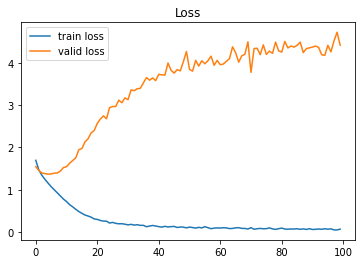

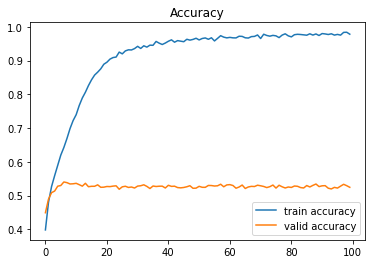

In [21]:
## 視覺化訓練模型的結果
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()